In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [2]:
# this allows figures to be saved as svg files with the text preserved
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
Cpx_Flo = pd.read_excel('PubData/FloreanaCpx_Gleeson.xlsx')
Cpx_Flo_weh = Cpx_Flo.copy()
Cpx_Flo = Cpx_Flo[Cpx_Flo['Group'] == "Antecryst"]
Cpx_Flo = Cpx_Flo.reset_index(drop = True)
Cpx_Flo.columns = Cpx_Flo.columns + '_Cpx'

Cpx_Flo_weh = Cpx_Flo_weh[Cpx_Flo_weh['Group'] == "Wehrlite"]
Cpx_Flo_weh = Cpx_Flo_weh.reset_index(drop = True)
Cpx_Flo_weh.columns = Cpx_Flo_weh.columns + '_Cpx'

Opx_Flo = pd.read_excel('PubData/FloreanaOpx_Gleeson.xlsx')
Opx_Flo = Opx_Flo[(Opx_Flo['Sample'] != "17MMSG03b") & (Opx_Flo['Sample'] != "17MMSG04b")]
Opx_Flo = Opx_Flo.reset_index(drop = True)
Opx_Flo.columns = Opx_Flo.columns + '_Opx'

Cpx_Wolf = pd.read_excel('PubData/Stock_Wolf_Cpx.xlsx')
Cpx_Wolf.columns = Cpx_Wolf.columns + '_Cpx'

In [4]:
color = {'03b': (0,0,0.56), '04b': 'b', '09g1': 'r', '09g2': 'y', '09g3': 'orange'}
Data = {}
for c in color:
    Data[c] = pd.read_excel('Data/FullEDSResults.xlsx', sheet_name=c)

In [5]:
Opx = {}
Cpx = {}
for c in color:
    Opx[c] = Data[c][Data[c]['Sample'].str.contains('Opx')]
    Opx[c] = Opx[c].reset_index(drop = True)
    Opx[c].columns = Opx[c].columns.str.replace('_Cpx', '_Opx', regex = True)

    Cpx[c] = Data[c][Data[c]['Sample'].str.contains('Cpx')]
    Cpx[c] = Cpx[c].reset_index(drop = True)

In [6]:
tern_points_FloCpx=pt.tern_points_px(px_comps=Cpx_Flo)
tern_points_FloCpxWeh=pt.tern_points_px(px_comps=Cpx_Flo_weh)
tern_points_FloOpx=pt.tern_points_px(px_comps=Opx_Flo)
tern_points_Wolf=pt.tern_points_px(px_comps=Cpx_Wolf)

tern_points_Cpx = {}
tern_points_Opx = {}
for c in color:
    tern_points_Cpx[c] = pt.tern_points_px(px_comps = Cpx[c])
    tern_points_Opx[c] = pt.tern_points_px(px_comps = Opx[c])

/Users/gleesonm/anaconda3/lib/python3.11/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


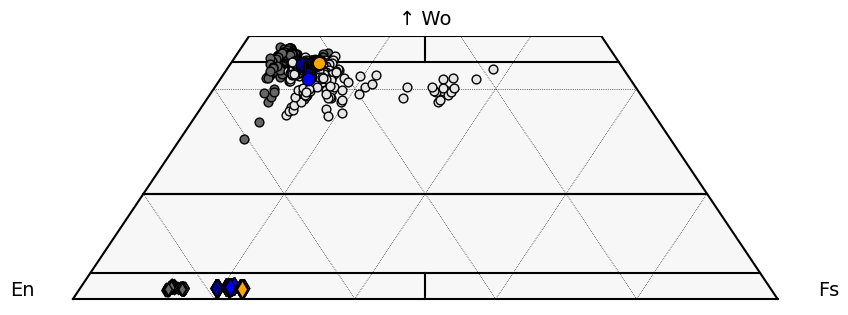

In [7]:
fig, tax = pt.plot_px_classification(figsize=(10, 3.5),  fontsize_component_labels=12,
                                     major_grid=True, minor_grid=False)

tax.scatter(tern_points_FloCpx, edgecolor="k", marker="o",
    facecolor=(0.4,0.4,0.4),
    label='Floreana Antecrysts',
   s=40
)

tax.scatter(tern_points_FloCpxWeh, edgecolor="k", marker="o",
    facecolor=(0.4,0.4,0.4),
    label='Floreana Wehrlites',
   s=40
)

tax.scatter(tern_points_FloOpx, edgecolor="k", marker="d",
    facecolor=(0.4,0.4,0.4),
    label='Floreana Wehrlites/Antecrysts',
   s=40
)

tax.scatter(tern_points_Wolf, edgecolor="k", marker="o",
    facecolor=(0.9,0.9,0.9),
    label='Volcan Wolf',
   s=40
)

for c in color:
    tax.scatter(tern_points_Cpx[c], edgecolor="k", marker="o",
        facecolor=color[c],
        label=c,
    s=80
    )

    tax.scatter(tern_points_Opx[c], edgecolor="k", marker="d",
        facecolor=color[c],
    s=80
    )


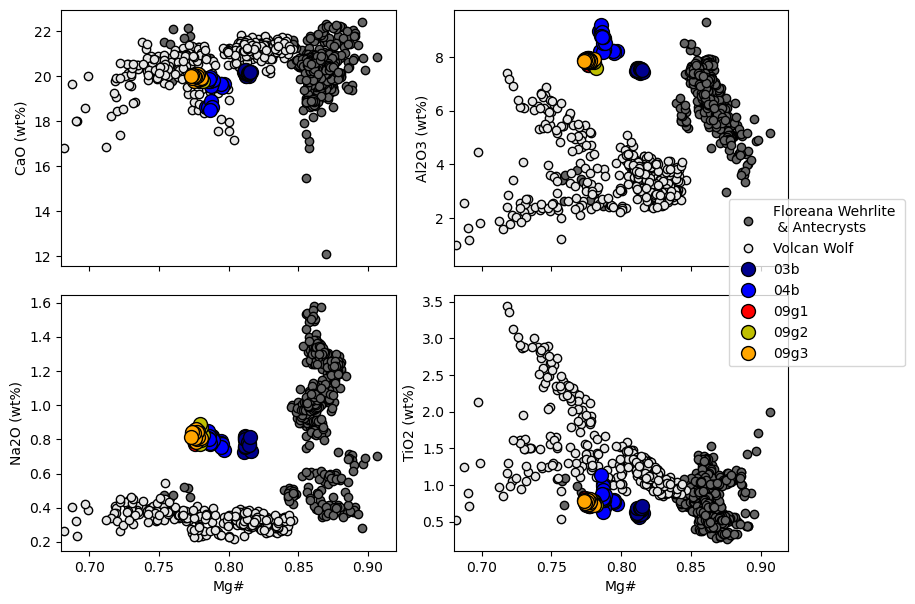

In [8]:
El = [['CaO', 'Al2O3'],['Na2O','TiO2']]

f, a = plt.subplots(2,2, figsize = (8,6), sharex = True)
f.tight_layout()
for i in range(2):
    for j in range(2):
        a[i][j].plot((Cpx_Flo['MgO_Cpx']/40.3044)/(Cpx_Flo['MgO_Cpx']/40.3044 + Cpx_Flo['FeOt_Cpx']/71.844),
                    Cpx_Flo[El[i][j]+'_Cpx'], 'ok', mfc = (0.4,0.4,0.4), label = 'Floreana Wehrlite \n & Antecrysts')
        a[i][j].plot((Cpx_Flo_weh['MgO_Cpx']/40.3044)/(Cpx_Flo_weh['MgO_Cpx']/40.3044 + Cpx_Flo_weh['FeOt_Cpx']/71.844),
                    Cpx_Flo_weh[El[i][j]+'_Cpx'], 'ok', mfc = (0.4,0.4,0.4))
        a[i][j].plot((Cpx_Wolf['MgO_Cpx']/40.3044)/(Cpx_Wolf['MgO_Cpx']/40.3044 + Cpx_Wolf['FeOt_Cpx']/71.844),
                    Cpx_Wolf[El[i][j]+'_Cpx'], 'ok', mfc = (0.9,0.9,0.9), label = "Volcan Wolf")
        for c in color:
            a[i][j].plot((Cpx[c]['MgO_Cpx']/40.3044)/(Cpx[c]['MgO_Cpx']/40.3044 + Cpx[c]['FeOt_Cpx']/71.844),
                        Cpx[c][El[i][j]+'_Cpx'], 'ok', mfc = color[c], ms = 10, label = c)
            
        
        a[i][j].set_ylabel(El[i][j] + ' (wt%)')

a[0][0].set_xlim([0.68, 0.92])
a[1][0].set_xlabel('Mg#')
a[1][1].set_xlabel('Mg#')

legend = a[1][1].legend(loc='upper left', bbox_to_anchor=(0.8, 1.4))
